In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook 

In [2]:
loan_result = pd.read_csv("loan_result.csv")
log_data = pd.read_csv("log_data.csv")
user_spec = pd.read_csv("user_spec.csv")

# EDA

## 1. 대출상품결과(loan_result)

In [3]:
loan_result

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
0,1748340,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN
1,1748340,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN
2,1748340,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN
3,1748340,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN
4,1748340,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN
...,...,...,...,...,...,...,...
13527358,1428218,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN
13527359,1428218,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN
13527360,1428218,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN
13527361,1428218,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN


In [4]:
loan_result = loan_result[(-loan_result["loan_limit"].isna()) & (-loan_result["loan_rate"].isna())]

In [5]:
#중복 데이터 존재 -> 제거해야할듯
loan_result[loan_result.duplicated()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
1507095,2160853,2022-06-16 09:47:23,10,65,29000000.0,15.6,NaN
2292642,662921,2022-06-14 12:20:50,10,65,19000000.0,15.6,NaN
2453028,361861,2022-03-10 09:16:08,10,65,36000000.0,12.2,1.0
2656633,124917,2022-03-01 18:41:01,10,65,50000000.0,12.2,1.0
3026732,893666,2022-06-21 10:34:14,10,65,34000000.0,12.7,NaN
3081480,1008438,2022-06-21 14:50:56,22,221,3000000.0,18.4,NaN
3681411,176009,2022-03-14 15:04:55,10,65,31000000.0,12.2,1.0
5455325,424582,2022-06-13 10:56:40,10,65,43000000.0,14.2,NaN
5550899,707257,2022-06-27 09:03:12,10,65,50000000.0,12.7,NaN
6231370,43839,2022-03-22 13:10:59,10,65,28000000.0,12.5,1.0


## 2. 유저로그데이터(log_data)

In [6]:
log_data

,user_id,event,timestamp,mp_os,mp_app_version,date_cd
0,576409,StartLoanApply,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,Android,3.8.2,2022-03-25
2,72878,EndLoanApply,2022-03-25 11:14:44,Android,3.8.4,2022-03-25
3,645317,OpenApp,2022-03-25 11:15:09,iOS,3.6.1,2022-03-25
4,645317,UseLoanManage,2022-03-25 11:15:11,iOS,3.6.1,2022-03-25
...,...,...,...,...,...,...
17843988,242442,StartLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843989,242442,EndLoanApply,2022-05-27 16:08:21,Android,3.13.0,2022-05-27
17843990,593062,OpenApp,2022-05-27 16:19:10,Android,3.13.0,2022-05-27
17843991,593062,Login,2022-05-27 16:19:15,Android,3.13.0,2022-05-27


In [7]:
log_data.isna().sum()

user_id                0
event                  0
timestamp              0
mp_os                980
mp_app_version    660597
date_cd                0
dtype: int64

## 3. 유저스펙테이블(user_spec)

In [8]:
user_spec0 = user_spec.copy()
user_spec = user_spec0.copy()

In [9]:
user_spec

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
0,1249046,118218,1985.0,1.0,2022-06-07 06:28:18,660.0,108000000.0,PRIVATEBUSINESS,20151101.0,기타,자가,1000000.0,기타,0.0,NaN,4.0,162000000.0
1,954900,553686,1968.0,1.0,2022-06-07 14:29:03,870.0,30000000.0,PRIVATEBUSINESS,20070201.0,정규직,기타가족소유,30000000.0,대환대출,0.0,NaN,1.0,27000000.0
2,137274,59516,1997.0,1.0,2022-06-07 21:40:22,710.0,30000000.0,FREELANCER,20210901.0,기타,기타가족소유,10000000.0,생활비,0.0,NaN,5.0,15000000.0
3,1570936,167320,1989.0,1.0,2022-06-07 09:40:27,820.0,62000000.0,EARNEDINCOME,20170101.0,정규직,자가,2000000.0,생활비,0.0,NaN,7.0,344000000.0
4,967833,33400,2000.0,1.0,2022-06-07 08:55:07,630.0,36000000.0,EARNEDINCOME,20210901.0,정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,202106.0,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN
1394212,1327066,151422,1955.0,1.0,2022-03-22 01:19:24,980.0,20000000.0,OTHERINCOME,NaN,기타,자가,50000000.0,생활비,NaN,NaN,1.0,NaN
1394213,1319606,173524,1983.0,1.0,2022-03-22 07:34:32,750.0,75000000.0,EARNEDINCOME,200908.0,정규직,자가,100000000.0,대환대출,NaN,NaN,8.0,200000000.0
1394214,1482466,766546,1975.0,1.0,2022-03-22 22:12:35,640.0,50000000.0,EARNEDINCOME,201705.0,정규직,자가,10000000.0,대환대출,NaN,NaN,10.0,117000000.0


데이터 전체 행 수 : 1,394,216

In [10]:
len(user_spec)

1394216

application_id(신청서) 수 : 1,394,216 ( == 데이터 전체 행 수)

In [11]:
len(user_spec["application_id"].unique())

1394216

user_id(이용자) 수 : 405,213\
 => 평균적으로 이용자 한 명당 약 3번 정도 핀다 신청을 함

In [12]:
len(user_spec["user_id"].unique())

405213

### loan_result에는 있지만 user_spec에는 없는 경우

**loan_result의 "application_id"와 user_spec의 "application_id"를 기준으로 merge**

In [13]:
loan_spec = pd.merge(loan_result,user_spec, how='left',on='application_id')

In [14]:
# 이 중에서 user_id가 결측인 값 => loan_result에 있는 application_id가 user_spec에는 없었다.
# 하지만 그런 경우는 없었음
loan_spec[loan_spec["user_id"].isna()]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,user_id,birth_year,gender,...,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt


### 날짜 형식 맞춰주기

In [15]:
# company_enter_month
company_enter_month_d = []
for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):
    try:
        company_enter_month_d.append(pd.to_datetime(i[0:6]+"01"))
    except:
        company_enter_month_d.append(np.nan)

<ipython-input-15-ea4bc05fa1fd>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec["company_enter_month"].astype(str)):


  0%|          | 0/1394216 [00:00<?, ?it/s]

In [16]:
user_spec["company_enter_month"] = company_enter_month_d

In [17]:
# insert_time
user_spec["insert_time"] = pd.to_datetime(user_spec["insert_time"])

### 신용점수

In [18]:
tmp = user_spec[user_spec["credit_score"].isna()]
tmp

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
39,246114,470525,1983.0,1.0,2022-06-07 22:00:53,NaN,45000000.0,OTHERINCOME,NaT,기타,전월세,30000000.0,사업자금,0.0,NaN,1.0,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
64,1036265,558745,1986.0,0.0,2022-06-07 17:20:08,NaN,48000000.0,EARNEDINCOME,2012-10-01,정규직,자가,280000000.0,주택구입,0.0,NaN,NaN,NaN
65,1930194,157472,1995.0,1.0,2022-06-07 16:34:09,NaN,40000000.0,EARNEDINCOME,2022-05-01,정규직,기타가족소유,7000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394120,1281112,493197,1987.0,1.0,2022-03-22 12:06:34,NaN,100000000.0,PRIVATEBUSINESS,2021-10-01,정규직,기타가족소유,50000000.0,사업자금,NaN,NaN,NaN,NaN
1394127,1121565,82805,1992.0,1.0,2022-03-22 11:42:39,NaN,30000000.0,EARNEDINCOME,2018-01-01,정규직,전월세,10000000.0,LIVING,NaN,NaN,NaN,NaN
1394141,1229782,250565,1989.0,1.0,2022-03-22 21:12:37,NaN,44000000.0,EARNEDINCOME,2018-04-01,정규직,전월세,20000000.0,기타,NaN,NaN,NaN,NaN
1394179,1264282,10298,1999.0,1.0,2022-03-22 14:31:24,NaN,10000000.0,FREELANCER,2021-06-01,기타,기타가족소유,3000000.0,전월세보증금,NaN,NaN,NaN,NaN


In [19]:
tmp.value_counts("employment_type")

employment_type
정규직    63748
기타     32630
계약직     7690
일용직     1044
dtype: int64

### income_type, employment_type, houseown_type 비율

In [20]:
user_spec["income_type"].value_counts()

EARNEDINCOME       892579
OTHERINCOME        172600
PRIVATEBUSINESS    126108
FREELANCER         103913
EARNEDINCOME2       78806
PRACTITIONER        20125
Name: income_type, dtype: int64

In [21]:
user_spec["employment_type"].value_counts()

정규직    918032
기타     345801
계약직    111445
일용직     18853
Name: employment_type, dtype: int64

In [22]:
user_spec["houseown_type"].value_counts()

전월세       642838
기타가족소유    465893
자가        283454
배우자         1946
Name: houseown_type, dtype: int64

In [23]:
user_spec["purpose"].value_counts()

생활비             866079
대환대출            353794
사업자금             62115
기타               30132
전월세보증금           27236
주택구입             17471
LIVING           15432
투자               12532
자동차구입             3394
SWITCHLOAN        3248
BUSINESS           935
ETC                593
HOUSEDEPOSIT       562
BUYHOUSE           307
INVEST             166
BUYCAR             135
Name: purpose, dtype: int64

### existing_loan_cnt, existing_loan_amt

In [24]:
user_spec[user_spec["existing_loan_cnt"].isna()]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [25]:
user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt
7,1146166,588743,1992.0,0.0,2022-06-07 17:19:33,750.0,46000000.0,EARNEDINCOME,2015-10-01,정규직,기타가족소유,6000000.0,생활비,0.0,0.0,NaN,NaN
23,1237618,717213,1986.0,1.0,2022-06-07 03:26:54,530.0,51000000.0,EARNEDINCOME,2017-05-01,정규직,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN
25,272600,754046,1980.0,1.0,2022-06-07 19:24:28,NaN,22000000.0,EARNEDINCOME,2009-01-01,정규직,전월세,22000000.0,대환대출,0.0,NaN,NaN,NaN
37,703129,324991,1994.0,0.0,2022-06-07 11:12:24,950.0,0.0,OTHERINCOME,NaT,기타,자가,50000000.0,기타,0.0,NaN,NaN,NaN
48,612258,59149,1998.0,1.0,2022-06-07 07:31:21,NaN,0.0,PRIVATEBUSINESS,2022-03-01,기타,전월세,1000000.0,생활비,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394184,1107103,162983,1978.0,1.0,2022-03-22 12:14:17,750.0,55000000.0,EARNEDINCOME,2014-08-01,정규직,전월세,50000000.0,생활비,NaN,NaN,NaN,NaN
1394203,943512,183117,1996.0,0.0,2022-03-22 16:22:21,710.0,24000000.0,EARNEDINCOME,2022-01-01,정규직,전월세,25000000.0,전월세보증금,NaN,NaN,NaN,NaN
1394204,1663661,183117,1996.0,0.0,2022-03-22 17:37:49,710.0,30000000.0,OTHERINCOME,NaT,기타,전월세,25000000.0,기타,NaN,NaN,NaN,NaN
1394211,1864587,489900,2000.0,1.0,2022-03-22 14:55:32,590.0,25000000.0,FREELANCER,2021-06-01,기타,기타가족소유,5000000.0,사업자금,NaN,NaN,NaN,NaN


In [26]:
user_spec[(-user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]["existing_loan_cnt"].value_counts()

1.0    115218
Name: existing_loan_cnt, dtype: int64

In [27]:
user_spec[user_spec["existing_loan_amt"] == 0]["existing_loan_cnt"].value_counts()

1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
6.0        1
5.0        1
9.0        1
Name: existing_loan_cnt, dtype: int64

# 결측치 대체

## user_spec

### 출생년도, 성별 결측치 대체

In [28]:
for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):
    user_spec.loc[i,"birth_year"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"birth_year"].mean()
    user_spec.loc[i,"gender"] = user_spec.loc[user_spec["user_id"] == user_spec.loc[i,"user_id"],"gender"].mean()

user_spec.isna().sum()

<ipython-input-28-50dd04275f99>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(user_spec[user_spec["birth_year"].isna()].index):


  0%|          | 0/12961 [00:00<?, ?it/s]

application_id                               0
user_id                                      0
birth_year                                9724
gender                                    9724
insert_time                                  0
credit_score                            105115
yearly_income                               90
income_type                                 85
company_enter_month                     171760
employment_type                             85
houseown_type                               85
desired_amount                              85
purpose                                     85
personal_rehabilitation_yn              587461
personal_rehabilitation_complete_yn    1203354
existing_loan_cnt                       198556
existing_loan_amt                       313774
dtype: int64

대체할 수 없는 출생년도와 성별은 대체보단 범주화

<AxesSubplot:>

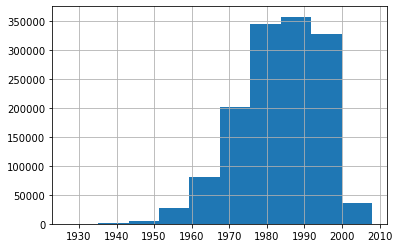

In [29]:
user_spec["birth_year"].hist()

In [30]:
user_spec["only_age"] = 2022 - user_spec["birth_year"]

**만으로 청소년(13-18세), 청년(19-29세), 중년(30-49세), 장년(50-64세), 노년(65세 이상)**

In [31]:
user_spec["cat_age"] =  pd.cut(user_spec["only_age"],[12,18, 29, 49, 64,100], right=False, labels=['청소년', '청년', '중년', '장년', '노년']).astype(object)
user_spec["cat_age"]

0          중년
1          장년
2          청년
3          중년
4          청년
           ..
1394211    청년
1394212    노년
1394213    중년
1394214    중년
1394215    중년
Name: cat_age, Length: 1394216, dtype: object

In [32]:
user_spec.loc[user_spec["cat_age"].isna(),"cat_age"] = "Missing_age"

In [33]:
user_spec["cat_gender"] = "Missing_gender"
user_spec.loc[user_spec["gender"] == 1,"cat_gender"] = "남성"
user_spec.loc[user_spec["gender"] == 0,"cat_gender"] = "여성"

나이 성별 범주화 완료

In [34]:
user_spec.value_counts(["cat_age","cat_gender"]).reset_index()

,cat_age,cat_gender,0
0,중년,남성,587014
1,중년,여성,279346
2,청년,남성,185929
3,장년,남성,148260
4,장년,여성,80445
5,청년,여성,75920
6,노년,남성,15084
7,노년,여성,12437
8,Missing_age,Missing_gender,9724
9,청소년,남성,41


### 개인정보(yearly_income, income_type, employment_type, houseown_type, desired_amount, purpose) 결측치 대체

In [35]:
#income_type, employment_type, houseown_type, desired_amount, purpose 결측 85개
#yearly_income 결측 85개
user_info_na = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]
user_info_na

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
5353,129515,135984,1974.0,1.0,2022-06-13 18:26:44,750.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,67000000.0,48.0,중년,남성
8864,1468193,151012,1996.0,1.0,2022-06-16 16:34:35,810.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6000000.0,26.0,청년,남성
17484,1234909,596908,1996.0,0.0,2022-06-16 16:28:10,640.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36000000.0,26.0,청년,여성
17552,1068316,142003,1976.0,0.0,2022-06-16 16:28:59,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.0,중년,여성
20510,2082836,827892,1993.0,1.0,2022-06-16 16:30:46,940.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,3.0,61000000.0,29.0,중년,남성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360335,450732,387671,1965.0,1.0,2022-06-16 16:30:17,650.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6000000.0,57.0,장년,남성
1363322,657920,839689,1995.0,1.0,2022-06-16 16:31:02,770.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,4.0,16000000.0,27.0,청년,남성
1367643,596953,264147,1984.0,1.0,2022-06-30 16:32:56,630.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1000000.0,38.0,중년,남성
1378239,999720,738199,1972.0,1.0,2022-03-12 21:49:37,520.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2000000.0,50.0,장년,남성


**- 위의 85개 경우는 전부 loan_result에 없는 application_id 이다.**

In [36]:
l_list = []
for i in user_info_na["application_id"]:
    l_list.append(len(loan_result[loan_result["application_id"] == i]))

In [37]:
np.unique(l_list)

array([0])

따라서 삭제가 적절하다고 판단

#### yearly_income만 결측인 경우

In [38]:
# yearly_income만 결측인 값 5개
user_spec[(-user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
165422,1026915,861363,1995.0,1.0,2022-06-30 21:11:51,NaN,NaN,OTHERINCOME,NaT,기타,전월세,5000000.0,생활비,0.0,0.0,NaN,NaN,27.0,청년,남성
233316,2045613,702899,1995.0,1.0,2022-06-30 18:37:04,520.0,NaN,FREELANCER,2022-06-01,기타,전월세,5000000.0,전월세보증금,0.0,0.0,1.0,1000000.0,27.0,청년,남성
597591,391560,329226,1996.0,0.0,2022-06-30 19:27:28,590.0,NaN,OTHERINCOME,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,9.0,27000000.0,26.0,청년,여성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
971960,1330905,771592,2003.0,1.0,2022-06-30 18:57:05,750.0,NaN,OTHERINCOME,NaT,기타,자가,3000000.0,생활비,0.0,0.0,1.0,3000000.0,19.0,청년,남성


- 전부 6월 30일에 생성되었다는 특징이 있음, 이유는 발견 못함

- application_id : 341149 만 loan_result에 행이 존재

In [39]:
loan_result[loan_result["application_id"] == 341149]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
4495392,341149,2022-06-30 21:32:20,64,254,45000000.0,10.3,NaN
4495394,341149,2022-06-30 21:32:19,13,262,35000000.0,16.4,NaN
4495395,341149,2022-06-30 21:32:19,38,113,5000000.0,19.5,NaN
4495396,341149,2022-06-30 21:32:19,14,128,15000000.0,12.5,NaN
4495399,341149,2022-06-30 21:32:19,29,265,10000000.0,9.1,NaN
4495401,341149,2022-06-30 21:32:19,57,71,23000000.0,15.4,NaN


#### 제거

yearly_income 기준 삭제
 - 그 전에 application_id 341149는 같은 user_id인 신청서가 존재하고 yearly_income이 0으로 적혀있었기 때문에 대체

In [40]:
user_spec[user_spec["user_id"] == 670502]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
566158,1746224,670502,1981.0,1.0,2022-06-30 22:41:11,930.0,0.0,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성
597613,341149,670502,1981.0,1.0,2022-06-30 21:32:18,930.0,NaN,OTHERINCOME,NaT,기타,기타가족소유,6000000.0,사업자금,0.0,0.0,1.0,3000000.0,41.0,중년,남성


In [41]:
#같은 user의 다른 application을 이용하여 대체, 생성일시를 제외한 모든 조건이 동일하기 때문에 연소득 대체 가능하다고 판단
user_spec.loc[user_spec["application_id"] == 341149, "yearly_income"] = user_spec.loc[user_spec["user_id"] == 670502,"yearly_income"].mean()

In [42]:
#연소득 기준 결측인 행 삭제
user_spec = user_spec[-user_spec["yearly_income"].isna()]

### 입사년도 결측치 대체

In [43]:
#user_id별로 company_enter_month 종류
user_spec[-user_spec["company_enter_month"].isna()].groupby('user_id')['company_enter_month'].nunique().sort_values(ascending = False)[0:20]

user_id
806361    30
132604    16
783956    13
292140    13
260768    12
634579    12
757883    12
436430    12
196512    11
305961    11
868369    11
591201    11
810420    10
224561    10
111290    10
278556    10
733252    10
23867     10
631410    10
419084     9
Name: company_enter_month, dtype: int64

In [44]:
user_spec[user_spec["user_id"]==806361]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
10051,636369,806361,1973.0,0.0,2022-06-07 06:45:37,660.0,3.000000e+09,FREELANCER,2015-01-01,기타,자가,5000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
38391,505409,806361,1973.0,0.0,2022-06-14 15:20:29,660.0,9.500000e+09,EARNEDINCOME2,1997-05-01,정규직,자가,6000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
39410,2066460,806361,1973.0,0.0,2022-06-16 10:28:53,660.0,1.000000e+08,OTHERINCOME,NaT,기타,자가,6000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
39411,919618,806361,1973.0,0.0,2022-06-16 14:48:04,660.0,9.500000e+08,EARNEDINCOME2,1997-01-01,기타,자가,10000000.0,주택구입,0.0,NaN,1.0,NaN,49.0,장년,여성
39782,901590,806361,1973.0,0.0,2022-04-06 14:59:51,630.0,9.500000e+09,EARNEDINCOME2,2001-01-01,정규직,자가,7000000.0,생활비,NaN,NaN,1.0,NaN,49.0,장년,여성
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930997,1508670,806361,1973.0,0.0,2022-06-07 05:42:26,660.0,8.000000e+09,EARNEDINCOME2,2002-02-01,계약직,자가,35000000.0,사업자금,0.0,NaN,1.0,NaN,49.0,장년,여성
932359,1890131,806361,1973.0,0.0,2022-06-13 11:21:24,660.0,3.000000e+08,OTHERINCOME,NaT,기타,자가,2000000.0,생활비,0.0,NaN,1.0,NaN,49.0,장년,여성
932827,1657879,806361,1973.0,0.0,2022-04-03 18:47:58,630.0,9.600000e+09,EARNEDINCOME2,2003-09-01,일용직,자가,5000000.0,생활비,NaN,NaN,1.0,NaN,49.0,장년,여성
934495,823920,806361,1973.0,0.0,2022-03-21 22:40:09,700.0,9.500000e+08,EARNEDINCOME2,1997-03-01,정규직,자가,35000000.0,대환대출,NaN,NaN,1.0,NaN,49.0,장년,여성


입사년도 종류가 30개인 미친놈 존재

income_type이 기타인 사용자들은 company_enter_month가 NA인 것이 당연함

하지만 그렇지 않은 사용자들은 company_enter_month가 NA인 것이 이상함

In [45]:
user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
89830,89051,776609,1991.0,0.0,2022-06-02 19:28:01,800.0,2000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
167239,860275,861913,1980.0,0.0,2022-05-02 16:19:56,NaN,21000000.0,EARNEDINCOME,NaT,정규직,전월세,20000000.0,LIVING,NaN,NaN,NaN,NaN,42.0,중년,여성
309603,478904,418233,1985.0,0.0,2022-05-15 17:40:59,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,3.0,20000000.0,37.0,중년,여성
411187,597961,851635,1971.0,0.0,2022-03-10 14:27:19,550.0,26000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,20000000.0,LIVING,NaN,NaN,5.0,68000000.0,51.0,장년,여성
645702,978338,418233,1985.0,0.0,2022-04-14 18:52:19,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,30000000.0,사업자금,NaN,NaN,3.0,20000000.0,37.0,중년,여성
658794,1024494,418233,1985.0,0.0,2022-05-16 15:28:53,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,50000000.0,사업자금,0.0,0.0,3.0,20000000.0,37.0,중년,여성
928074,994477,546184,1981.0,0.0,2022-03-31 10:50:56,NaN,30000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,3.0,62000000.0,41.0,중년,여성
945656,1401966,776609,1991.0,0.0,2022-05-13 23:15:27,930.0,26000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
1057011,1026844,174784,1998.0,1.0,2022-04-08 15:12:08,NaN,32000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,24.0,청년,남성


In [46]:
loan_result[loan_result["application_id"] == 860275]

,application_id,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied
11273330,860275,2022-05-02 16:19:58,58,175,11000000.0,14.8,0.0
11273331,860275,2022-05-02 16:19:58,6,36,8000000.0,17.7,0.0
11273332,860275,2022-05-02 16:19:57,51,247,25000000.0,18.9,0.0
11273333,860275,2022-05-02 16:19:58,32,56,5000000.0,17.7,0.0


In [47]:
for i in user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]["user_id"]:
    print(i,":", sum(user_spec["user_id"] == i))

759028 : 4
776609 : 2
861913 : 1
418233 : 3
851635 : 1
418233 : 3
418233 : 3
546184 : 2
776609 : 2
174784 : 1


In [48]:
user_spec[user_spec["user_id"] == 759028]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
101410,1176623,759028,1962.0,1.0,2022-04-27 11:45:40,600.0,24000000.0,EARNEDINCOME,2021-10-01,정규직,자가,15000000.0,대환대출,0.0,NaN,1.0,15000000.0,60.0,장년,남성
886336,693346,759028,1962.0,1.0,2022-06-30 11:05:37,580.0,30000000.0,EARNEDINCOME,2021-09-01,정규직,기타가족소유,16000000.0,생활비,0.0,0.0,1.0,15000000.0,60.0,장년,남성
1357869,637591,759028,1962.0,1.0,2022-03-04 15:53:19,NaN,26000000.0,EARNEDINCOME,2021-10-01,정규직,자가,10000000.0,생활비,NaN,NaN,1.0,15000000.0,60.0,장년,남성


In [49]:
for i in user_spec[(user_spec["company_enter_month"].isna()) & (user_spec["income_type"]!="OTHERINCOME")]["application_id"]:
    print(i,":", sum(loan_result["application_id"] == i))

1728563 : 0
89051 : 23
860275 : 4
478904 : 7
597961 : 0
978338 : 9
1024494 : 7
994477 : 0
1401966 : 21
1026844 : 7


소득 종류에 따라 입사년도 결측인 비율이 다름. 기타에 해당하는 주부, 학생은 입사년도가 존재하는 경우도 있음

In [50]:
user_spec[user_spec["company_enter_month"].isna()].value_counts("income_type")

income_type
OTHERINCOME        171662
EARNEDINCOME            7
PRIVATEBUSINESS         3
dtype: int64

In [51]:
aa = user_spec[user_spec["company_enter_month"].isna()]
aa[aa["income_type"]=="EARNEDINCOME"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
77585,1728563,759028,1962.0,1.0,2022-05-11 16:06:26,600.0,30000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,1.0,15000000.0,60.0,장년,남성
89830,89051,776609,1991.0,0.0,2022-06-02 19:28:01,800.0,2000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
167239,860275,861913,1980.0,0.0,2022-05-02 16:19:56,NaN,21000000.0,EARNEDINCOME,NaT,정규직,전월세,20000000.0,LIVING,NaN,NaN,NaN,NaN,42.0,중년,여성
411187,597961,851635,1971.0,0.0,2022-03-10 14:27:19,550.0,26000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,20000000.0,LIVING,NaN,NaN,5.0,68000000.0,51.0,장년,여성
928074,994477,546184,1981.0,0.0,2022-03-31 10:50:56,NaN,30000000.0,EARNEDINCOME,NaT,정규직,기타가족소유,10000000.0,LIVING,NaN,NaN,3.0,62000000.0,41.0,중년,여성
945656,1401966,776609,1991.0,0.0,2022-05-13 23:15:27,930.0,26000000.0,EARNEDINCOME,NaT,계약직,전월세,10000000.0,생활비,0.0,0.0,1.0,NaN,31.0,중년,여성
1057011,1026844,174784,1998.0,1.0,2022-04-08 15:12:08,NaN,32000000.0,EARNEDINCOME,NaT,정규직,전월세,10000000.0,SWITCHLOAN,NaN,NaN,NaN,NaN,24.0,청년,남성


In [52]:
aa[aa["income_type"]=="PRIVATEBUSINESS"]

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender
309603,478904,418233,1985.0,0.0,2022-05-15 17:40:59,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,20000000.0,생활비,0.0,0.0,3.0,20000000.0,37.0,중년,여성
645702,978338,418233,1985.0,0.0,2022-04-14 18:52:19,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,30000000.0,사업자금,NaN,NaN,3.0,20000000.0,37.0,중년,여성
658794,1024494,418233,1985.0,0.0,2022-05-16 15:28:53,690.0,50000000.0,PRIVATEBUSINESS,NaT,기타,전월세,50000000.0,사업자금,0.0,0.0,3.0,20000000.0,37.0,중년,여성


### personal_rehabilitation_yn, personal_rehabilitation_complete_yn

- 개인 회생자 신청 여부(0:개인회생자 X, 1:개인회생자O)
- 개인 회생 완료 여부(personal_rehabilitation_yn == 1인 사람들 중, 0:납입중, 1:완료)

상식적으로 존재 가능한 경우의 수 : (0,NA), (1,0), (1,1)

In [53]:
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

1,NA : (0, 20)
1,0 or 1,1 : (12709, 20)
0,NA : (615893, 20)
0,0 or 0,1 : (178149, 20)


이상값인 0,0 or 0,1 는 아마도 개인회생자 여부를 체크 한 후, 다시 해제한 경우일 가능성이 있음!

-> 그렇다면 전부 0, NA로 대체하는 것이 옳음

In [54]:
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna()), "personal_rehabilitation_complete_yn"] = np.nan

C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [55]:
print("1,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("1,0 or 1,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 1) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,NA :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (user_spec["personal_rehabilitation_complete_yn"].isna())].shape)
print("0,0 or 0,1 :",user_spec[(user_spec["personal_rehabilitation_yn"] == 0) & (-user_spec["personal_rehabilitation_complete_yn"].isna())].shape)

1,NA : (0, 20)
1,0 or 1,1 : (12709, 20)
0,NA : (794042, 20)
0,0 or 0,1 : (0, 20)


**개인회생 관련 변수를 하나의 변수로 범주화**

In [56]:
user_spec["rehabilitation"] = "rehabilitation_not"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 0),"rehabilitation"] = "rehabilitation"
user_spec.loc[(user_spec["personal_rehabilitation_yn"] == 1) & (user_spec["personal_rehabilitation_complete_yn"] == 1),"rehabilitation"] = "rehabilitation_completed"

<ipython-input-56-a6bc3e9743ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_spec["rehabilitation"] = "rehabilitation_not"
C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

rehabilitation_not : 개인회생자가 아님\
rehabilitation : 개인회생자이며, 납입중임\
rehabilitation_completed : 개인회생자이며, 납입 완료했음

In [57]:
user_spec["rehabilitation"].value_counts()

rehabilitation_not          1381418
rehabilitation                11361
rehabilitation_completed       1348
Name: rehabilitation, dtype: int64

### existing_loan_cnt, existing_loan_amt 결측치 대체

먼저, 기대출 횟수, 잔액이 변동된 경우는 없다.

In [58]:
user_loan_amt_min = user_spec.groupby("user_id").min()["existing_loan_amt"]
user_loan_amt_max = user_spec.groupby("user_id").max()["existing_loan_amt"]
user_loan_amt_min[user_loan_amt_min != user_loan_amt_max].max()

nan

In [59]:
user_loan_cnt_min = user_spec.groupby("user_id").min()["existing_loan_cnt"]
user_loan_cnt_max = user_spec.groupby("user_id").max()["existing_loan_cnt"]
user_loan_cnt_min[user_loan_cnt_min != user_loan_cnt_max].max()

nan

#### 기대출 횟수와 잔액의 NA여부를 바탕으로 그룹 형성

- 횟수가 0인 경우는 없음
- 잔액이 NA인 경우는 횟수가 NA또는 1
- 잔액이 0인 경우 존재

NA NA : 대출 경험 없음

1 NA : 이상값

!NA 0 : 이상값

!NA !NA : 기대출 보유자

In [60]:
loan_na_na = user_spec[(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_na_na.value_counts("existing_loan_cnt")

Series([], dtype: int64)

In [61]:
loan_notna_na = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna())]
loan_notna_na.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0    115212
dtype: int64

In [69]:
loan_notna_notna = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (-user_spec["existing_loan_amt"].isna())]
loan_notna_notna.value_counts("existing_loan_cnt")

existing_loan_cnt
3.0      155923
2.0      145538
4.0      144384
1.0      126369
5.0      124044
          ...  
84.0          1
107.0         1
102.0         1
96.0          1
73.0          1
Length: 100, dtype: int64

In [62]:
loan_notna_0 = user_spec[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"]==0)]
loan_notna_0.value_counts("existing_loan_cnt")

existing_loan_cnt
1.0     4636
2.0      409
3.0       68
4.0       11
13.0       3
5.0        1
6.0        1
9.0        1
dtype: int64

#### 특징 확인

청소년으로 분리했던 만 14~18세는 NA,NA 혹은 1,NA이다.

In [63]:
baby = user_spec[user_spec["cat_age"] == "청소년"]
baby

,application_id,user_id,birth_year,gender,insert_time,credit_score,yearly_income,income_type,company_enter_month,employment_type,...,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,only_age,cat_age,cat_gender,rehabilitation
94620,578586,13353,2005.0,1.0,2022-06-30 21:22:20,NaN,0.0,OTHERINCOME,NaT,기타,...,0.000000e+00,생활비,0.0,NaN,1.0,NaN,17.0,청소년,남성,rehabilitation_not
111609,523209,446404,2006.0,1.0,2022-03-21 04:47:14,NaN,0.0,OTHERINCOME,NaT,기타,...,0.000000e+00,생활비,NaN,NaN,1.0,NaN,16.0,청소년,남성,rehabilitation_not
122044,311025,779832,2006.0,1.0,2022-03-08 17:32:50,NaN,50000000.0,OTHERINCOME,NaT,기타,...,0.000000e+00,생활비,NaN,NaN,NaN,NaN,16.0,청소년,남성,rehabilitation_not
142639,1329068,40684,2005.0,0.0,2022-06-28 13:03:10,NaN,0.0,OTHERINCOME,NaT,기타,...,0.000000e+00,생활비,0.0,NaN,NaN,NaN,17.0,청소년,여성,rehabilitation_not
154434,17414,779832,2006.0,1.0,2022-03-08 14:37:00,NaN,40000000.0,OTHERINCOME,NaT,기타,...,3.000000e+06,생활비,NaN,NaN,NaN,NaN,16.0,청소년,남성,rehabilitation_not
157790,591938,798868,2007.0,1.0,2022-03-08 23:41:00,NaN,0.0,OTHERINCOME,NaT,기타,...,0.000000e+00,기타,NaN,NaN,NaN,NaN,15.0,청소년,남성,rehabilitation_not
186027,325630,446222,2005.0,1.0,2022-04-10 09:56:22,NaN,10000000.0,OTHERINCOME,NaT,기타,...,1.000000e+06,생활비,NaN,NaN,NaN,NaN,17.0,청소년,남성,rehabilitation_not
213253,344496,152312,2008.0,1.0,2022-05-09 23:43:13,NaN,2000000.0,OTHERINCOME,NaT,기타,...,1.000000e+06,기타,0.0,NaN,NaN,NaN,14.0,청소년,남성,rehabilitation_not
253265,2004801,488679,2006.0,1.0,2022-06-26 17:07:59,NaN,898000000.0,EARNEDINCOME,2022-06-01,정규직,...,8.977000e+09,생활비,1.0,0.0,1.0,NaN,16.0,청소년,남성,rehabilitation
267247,1496059,227623,2007.0,1.0,2022-06-26 23:04:32,NaN,0.0,OTHERINCOME,NaT,기타,...,1.000000e+06,생활비,0.0,NaN,NaN,NaN,15.0,청소년,남성,rehabilitation_not


청소년은 loan_result에 행이 존재하지 않음.\
즉, 대출 승인이 나지 않았거나, 결과창을 보지않았음.

In [64]:
n = 0
for i in baby["application_id"]:
    n += len(loan_result[loan_result["application_id"]==i])
print(n)

0


가설) !NA, 0인 값들은 기대출 잔액이 50만원보다 적어서 반올림 결과 0이 된 것이다.

가설) 1, NA인 값들은 대출 무경험자와, 대출 완납 경험자를 구분하기 위한 것이다. 즉, 1, NA는 완납 경험자이다.

#### 그룹 간의 신용 점수에서 차이를 보였다.

In [65]:
loan_na_na["credit_score"].describe()

count    121232.000000
mean        665.470998
std         159.270887
min          60.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [66]:
loan_notna_na["credit_score"].describe()

count    112818.000000
mean        653.847081
std         160.652877
min         100.000000
25%         580.000000
50%         640.000000
75%         750.000000
max        1000.000000
Name: credit_score, dtype: float64

In [67]:
loan_notna_0["credit_score"].describe()

count    4988.000000
mean      722.082999
std       196.428333
min       100.000000
25%       610.000000
50%       730.000000
75%       880.000000
max      1000.000000
Name: credit_score, dtype: float64

In [70]:
loan_notna_notna["credit_score"].describe()

count    1.054966e+06
mean     6.336904e+02
std      1.152173e+02
min      9.000000e+01
25%      5.700000e+02
50%      6.200000e+02
75%      6.800000e+02
max      1.000000e+03
Name: credit_score, dtype: float64

**신용 점수 관련 T 검정**

In [71]:
loan_notna_na_c_score = loan_notna_na["credit_score"].copy()
loan_notna_na_c_score = loan_notna_na_c_score[loan_notna_na_c_score.notna()]

loan_notna_notna_c_score = loan_notna_notna["credit_score"].copy()
loan_notna_notna_c_score = loan_notna_notna_c_score[loan_notna_notna_c_score.notna()]

loan_na_na_c_score = loan_na_na["credit_score"].copy()
loan_na_na_c_score = loan_na_na_c_score[loan_na_na_c_score.notna()]

loan_notna_0_c_score = loan_notna_0["credit_score"].copy()
loan_notna_0_c_score = loan_notna_0_c_score[loan_notna_0_c_score.notna()]

In [72]:
import scipy.stats as stats

In [73]:
#1, NA인 경우가 !NA, !NA보다는 신용 점수가 크다
stats.ttest_ind(loan_notna_na_c_score, loan_notna_notna_c_score, equal_var = False)

Ttest_indResult(statistic=41.02924395629673, pvalue=0.0)

In [74]:
#NA, NA인 경우가 1, NA보다는 신용 점수가 크다
stats.ttest_ind(loan_na_na_c_score, loan_notna_na_c_score, equal_var = False)

Ttest_indResult(statistic=17.563376354084763, pvalue=5.208676093543016e-69)

In [75]:
#!NA, 0인 경우가 NA, NA보다는 신용 점수가 크다
stats.ttest_ind(loan_notna_0_c_score, loan_na_na_c_score, equal_var = False)

Ttest_indResult(statistic=20.084994692461724, pvalue=1.6286048789119013e-86)

**신용 점수 관련 ANOVA 검정**

In [76]:
F_statistic, pVal = stats.f_oneway(loan_notna_na_c_score, loan_notna_notna_c_score, loan_na_na_c_score, loan_notna_0_c_score)

print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=3716.7, p=0.00000
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


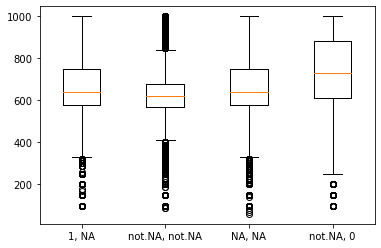

In [77]:
plot_data = [loan_notna_na_c_score, loan_notna_notna_c_score, loan_na_na_c_score, loan_notna_0_c_score]
ax = plt.boxplot(plot_data)
plt.xticks([1,2,3,4], ["1, NA", "not.NA, not.NA", "NA, NA", "not.NA, 0"])
plt.show()

**<결론>**\
신용 점수 기준\
(!NA, 0) > (NA, NA) > (1, NA) > (!NA, !NA) 

In [78]:
# 이상치(대출 완납 경험자)를 구분하기 위한 범주형 변수 추가
user_spec["existing_loan_error"] = 0
user_spec.loc[-(user_spec["existing_loan_cnt"].isna()) & (user_spec["existing_loan_amt"].isna()),"existing_loan_error"] = 1

<ipython-input-78-49eb3847c3a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_spec["existing_loan_error"] = 0
C:\Users\lsj70\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
user_spec["existing_loan_cnt"] = user_spec["existing_loan_cnt"].fillna(0)
user_spec["existing_loan_amt"] = user_spec["existing_loan_amt"].fillna(0)

<ipython-input-79-fa150de17136>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_spec["existing_loan_cnt"] = user_spec["existing_loan_cnt"].fillna(0)
<ipython-input-79-fa150de17136>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_spec["existing_loan_amt"] = user_spec["existing_loan_amt"].fillna(0)


In [ ]:
stop! wait a minute!

여기 아래로는 너무 오래 걸려유

전체 실행 자동 정지!

## 어플 사용자 경우의 수

1. 개인정보 null, log 확인시 complete 이후에 end가 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

2. 개인정보 null, log 확인시 complete 이후에 end가 있다면 -> 오류일 가능성!

3. 개인정보 not-null, application_id가 loan_result에 있다면 -> 대출받을 사람임!

4. 개인정보 not-null, application_id가 loan_result에 없다면 -> 다른 업무를 위해 어플을 사용할 가능성!

In [ ]:
#1,2번
user_info_nan = user_spec[(user_spec["income_type"].isna()) & (user_spec["employment_type"].isna()) & 
         (user_spec["houseown_type"].isna()) & (user_spec["desired_amount"].isna()) & 
                (user_spec["purpose"].isna()) & (user_spec["yearly_income"].isna())][["application_id","user_id"]]

true_index=[]
for i in tqdm_notebook(range(len(tmp))):
    log_tmp = log_data[log_data["user_id"] == user_info_nan.iloc[i,1]]
    user_tmp = user_spec[user_spec["application_id"] == user_info_nan.iloc[i,0]]
    
    true_index.append(log_tmp[(log_tmp["timestamp"].dt.month == user_tmp["insert_time"].dt.month.mean()) & 
    (log_tmp["timestamp"].dt.day == user_tmp["insert_time"].dt.day.mean())]["event"].isin(["EndLoanApply"]).max())

In [ ]:
user_info_nan["complete"] = true_index
user_info_nan

In [ ]:
#2번에 해당하는 경우
user_info_nan[user_info_nan["complete"] == True].shape

In [ ]:
#3,4번
app_tmp = user_spec[(-user_spec["income_type"].isna()) & (-user_spec["employment_type"].isna()) & 
         (-user_spec["houseown_type"].isna()) & (-user_spec["desired_amount"].isna()) & 
                (-user_spec["purpose"].isna()) & (-user_spec["yearly_income"].isna())]["application_id"]

true_index2=[]
for i in tqdm_notebook(app_tmp):
    if len(loan_result[loan_result["application_id"] == i]) == 0:
        true_index2.append(False)
    else:
        true_index2.append(True)


In [ ]:
np.mean(true_index2)